# Perceptrons

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, tol=-np.infty, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [10]:
(iris.target == 0).astype(np.int)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Multi-Layer Perceptron and Backpropagation

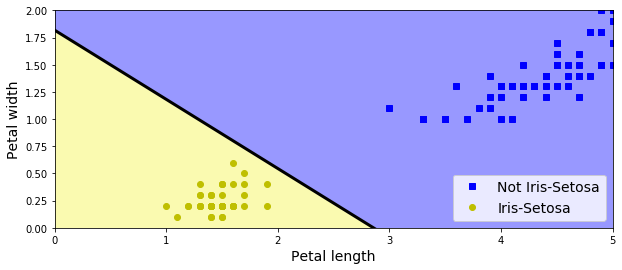

In [14]:
import matplotlib.pyplot as plt

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

# Activation Function

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)


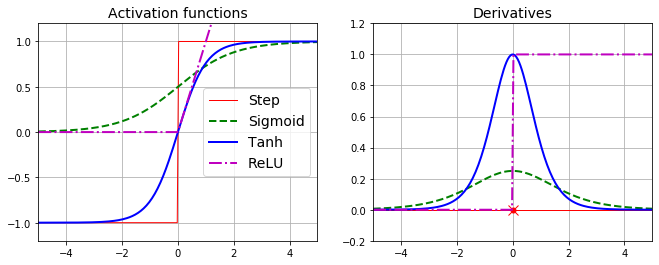

In [15]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

#save_fig("activation_functions_plot")
plt.show()

# Training an MLP with TensorFlow’s High-Level API

In [203]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [204]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                     feature_columns=feature_cols)

input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ndp\\AppData\\Local\\Temp\\tmplus3__ev', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensor

In [205]:
test_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-03-23T01:16:33Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ndp\AppData\Local\Temp\tmplus3__ev\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.22900s
INFO:tensorflow:Finished evaluation at 2020-03-23-01:16:33
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9484, average_loss = 0.1803232, global_step = 44000, loss = 0.17888235
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: C:\Users\ndp\AppData\Local\Temp\tmplus3__ev\model.ckpt-44000


In [206]:
eval_results

{'accuracy': 0.9484,
 'average_loss': 0.1803232,
 'loss': 0.17888235,
 'global_step': 44000}

# Training a DNN Using Plain TensorFlow

In [209]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [210]:
def reset_graph(seed=42):
    tf.compat.v1.reset_default_graph()
    tf.compat.v1.set_random_seed(seed)
    np.random.seed(seed)

reset_graph()
tf.compat.v1.disable_eager_execution()
X = tf.compat.v1.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.compat.v1.placeholder(tf.int32, shape=(None), name="y")


In [211]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.compat.v1.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [212]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [213]:
logits

<tf.Tensor 'dnn/outputs/add:0' shape=(?, 10) dtype=float32>

In [214]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [215]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [223]:
with tf.name_scope("eval"):
    correct = tf.math.in_top_k(y,logits,1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)

In [224]:
init = tf.compat.v1.global_variables_initializer()
saver = tf.compat.v1.train.Saver()

In [225]:
n_epochs = 40
batch_size = 50

def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

with tf.compat.v1.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)

    #save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.94 Val accuracy: 0.9154
1 Batch accuracy: 0.94 Val accuracy: 0.934
2 Batch accuracy: 0.92 Val accuracy: 0.9434
3 Batch accuracy: 0.96 Val accuracy: 0.95
4 Batch accuracy: 0.94 Val accuracy: 0.9534
5 Batch accuracy: 1.0 Val accuracy: 0.9592
6 Batch accuracy: 0.94 Val accuracy: 0.9632
7 Batch accuracy: 0.96 Val accuracy: 0.9654
8 Batch accuracy: 0.94 Val accuracy: 0.9656
9 Batch accuracy: 0.94 Val accuracy: 0.9682
10 Batch accuracy: 0.98 Val accuracy: 0.9686
11 Batch accuracy: 0.98 Val accuracy: 0.9684
12 Batch accuracy: 0.98 Val accuracy: 0.9696
13 Batch accuracy: 1.0 Val accuracy: 0.97
14 Batch accuracy: 0.92 Val accuracy: 0.9722
15 Batch accuracy: 1.0 Val accuracy: 0.972
16 Batch accuracy: 1.0 Val accuracy: 0.9726
17 Batch accuracy: 0.98 Val accuracy: 0.9744
18 Batch accuracy: 0.96 Val accuracy: 0.974
19 Batch accuracy: 1.0 Val accuracy: 0.9734
20 Batch accuracy: 1.0 Val accuracy: 0.9762
21 Batch accuracy: 0.98 Val accuracy: 0.9746
22 Batch accuracy: 0.98 Val accur

In [226]:
with tf.compat.v1.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [227]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", y_test[:20])

Predicted classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


UsageError: Line magic function `%tensorboard` not found.


In [231]:
show_graph(tf.get_default_graph())

NameError: name 'show_graph' is not defined

# Using dense() instead of neuron_layer()

In [235]:
from tensorflow import keras

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10


reset_graph()

X = tf.compat.v1.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.compat.v1.placeholder(tf.int32, shape=(None), name="y")


with tf.name_scope("dnn"):
    hidden1 = tf.compat.v1.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.compat.v1.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.compat.v1.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)


with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")


learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)


with tf.name_scope("eval"):
    correct = tf.math.in_top_k(y,logits,1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))


init = tf.compat.v1.global_variables_initializer()
saver = tf.compat.v1.train.Saver()


n_epochs = 20
n_batches = 50

with tf.compat.v1.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    #save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Validation accuracy: 0.9024
1 Batch accuracy: 0.92 Validation accuracy: 0.9254
2 Batch accuracy: 0.94 Validation accuracy: 0.9372
3 Batch accuracy: 0.9 Validation accuracy: 0.9416
4 Batch accuracy: 0.94 Validation accuracy: 0.9472
5 Batch accuracy: 0.94 Validation accuracy: 0.9512
6 Batch accuracy: 1.0 Validation accuracy: 0.9548
7 Batch accuracy: 0.94 Validation accuracy: 0.961
8 Batch accuracy: 0.96 Validation accuracy: 0.9622
9 Batch accuracy: 0.94 Validation accuracy: 0.9648
10 Batch accuracy: 0.92 Validation accuracy: 0.966
11 Batch accuracy: 0.98 Validation accuracy: 0.9666
12 Batch accuracy: 0.98 Validation accuracy: 0.9684
13 Batch accuracy: 0.98 Validation accuracy: 0.9704
14 Batch accuracy: 1.0 Validation accuracy: 0.9696
15 Batch accuracy: 0.94 Validation accuracy: 0.9718
16 Batch accuracy: 0.98 Validation accuracy: 0.9726
17 Batch accuracy: 1.0 Validation accuracy: 0.973
18 Batch accuracy: 0.98 Validation accuracy: 0.9746
19 Batch accuracy: 0.96 Valida

In [239]:
tf.compat.v1.layers.dense

<function tensorflow.python.layers.core.dense(inputs, units, activation=None, use_bias=True, kernel_initializer=None, bias_initializer=<tensorflow.python.ops.init_ops.Zeros object at 0x00000280A6A56688>, kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, trainable=True, name=None, reuse=None)>